# Setup

In [1]:
# Step 1: Import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the datasets
policy_df = pd.read_csv('csv/all_data_en.csv')
region = pd.read_csv('csv/region.csv')

# Step 3: Merge the region information with policy data
region = region[['alpha-3', 'region', 'sub-region', 'intermediate-region']]
policy_df = policy_df.merge(region, left_on='Geography ISO', right_on='alpha-3', how='left')

# Step 4: Show the first few rows to verify the data merge
policy_df.head()

,index,Document ID,Document Title,Family ID,Family Title,Family Summary,Collection Title(s),Collection Description(s),Document Role,Document Variant,...,Internal Collection ID(s),have_support_doc?,raw_doc_path,doc_id,text_file_path,lang,alpha-3,region,sub-region,intermediate-region
0,0,act-on-the-promotion-of-the-development-use-an...,"Act on the Promotion of the Development, Use a...",act-on-the-promotion-of-the-development-use-an...,"Act on the Promotion of the Development, Use a...",The revised Act on the Promotion of the Develo...,NaN,NaN,Main,Original Language,...,NaN,True,climate_laws/1_pdfs/document_0.pdf,document_0,../climate_laws\en_cleaned_text_1\document_0.txt,en,KOR,Asia,Eastern Asia,NaN
1,4728,national-redd-strategy-2017-2027-nec-decision-...,National REDD+ Strategy 2017-2027 (NEC decisio...,national-redd-strategy-2017-2027-nec-decision-...,National REDD+ Strategy 2017-2027 (NEC decisio...,The strategy is a key part of the country's re...,NaN,NaN,Main,NaN,...,NaN,True,climate_laws/1_pdfs/document_4628.pdf,document_4628,../climate_laws\en_cleaned_text_2\document_462...,en,PNG,Oceania,Melanesia,NaN
2,4740,act-on-the-improvement-of-energy-consumption-p...,Act on the Improvement of Energy Consumption P...,act-on-the-improvement-of-energy-consumption-p...,Act on the Improvement of Energy Consumption P...,This Act provides for 1) regulatory measures f...,NaN,NaN,Main,NaN,...,NaN,True,climate_laws/1_pdfs/document_4640.pdf,document_4640,../climate_laws\en_cleaned_text_1\document_464...,en,JPN,Asia,Eastern Asia,NaN
3,4739,climate-protection-policy-executive-summary_4e45,Climate Protection Policy: Executive Summary,climate-protection-policy-government-resolutio...,"Climate Protection Policy, Government Resoluti...",The Climate Protection Policy (CPP) of 2017 is...,NaN,NaN,Summary,NaN,...,NaN,True,climate_laws/1_pdfs/document_4639.pdf,document_4639,../climate_laws\en_cleaned_text_1\document_463...,en,CZE,Europe,Eastern Europe,NaN
4,4736,forest-law-of-the-people-s-republic-of-china_7bd3,Forest Law of the People's Republic of China,forest-law-of-the-people-s-republic-of-china_15c2,Forest Law of the People's Republic of China,"This law aims at protecting, cultivating and r...",NaN,NaN,Main,NaN,...,NaN,True,climate_laws/7_pdfs/document_4636.pdf,document_4636,../climate_laws\en_cleaned_text_1\document_463...,en,CHN,Asia,Eastern Asia,NaN


In [4]:
test_set = pd.read_csv('csv/test.csv')
train_set = pd.read_csv('csv/data.csv')

train_set = train_set[~train_set['Document ID'].isin(test_set['Document ID'])]

benchmark_set = policy_df

# Visuallizing the region distribution

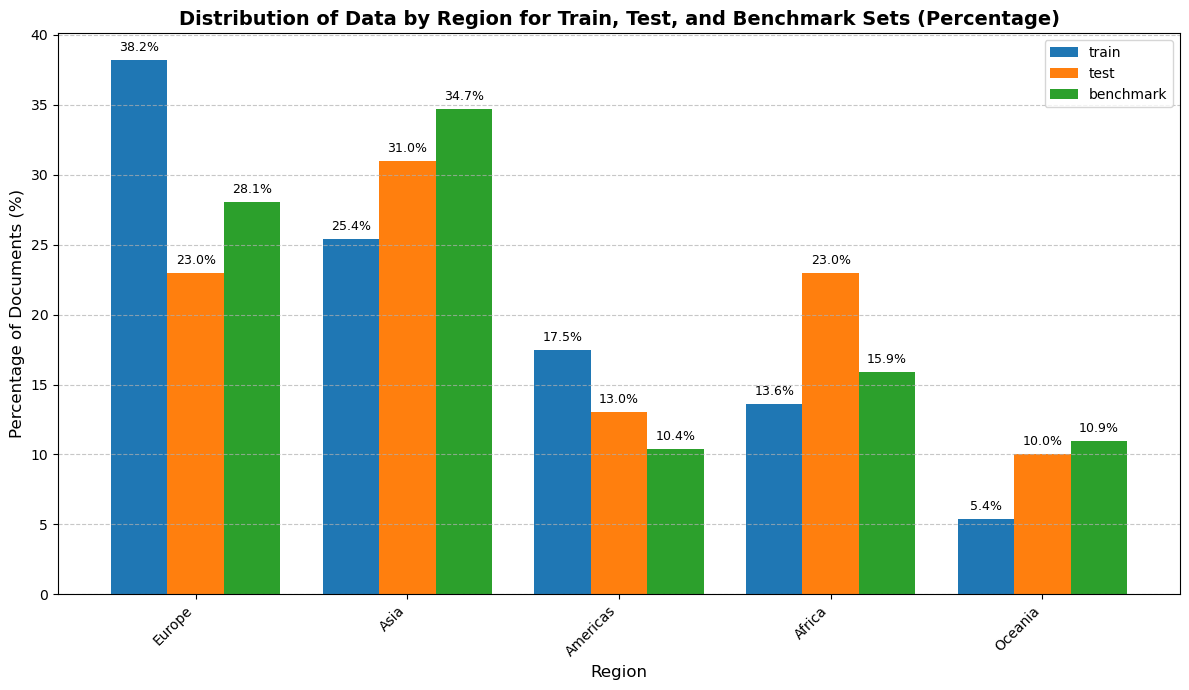

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'region' and 'Document ID' columns exist in the datasets
# Replace 'region' with the actual column name if different

# Step 1: Aggregate region distribution for train, test, and benchmark sets
train_region_distribution = train_set['region'].value_counts(normalize=True).rename('train') * 100
test_region_distribution = test_set['region'].value_counts(normalize=True).rename('test') * 100
benchmark_region_distribution = benchmark_set['region'].value_counts(normalize=True).rename('benchmark') * 100

# Step 2: Combine into a single DataFrame for visualization
combined_distribution = pd.concat([train_region_distribution, test_region_distribution, benchmark_region_distribution], axis=1).fillna(0)

# Step 3: Plot the distribution with decoration
ax = combined_distribution.plot(kind='bar', figsize=(12, 7), width=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Decoration
ax.set_xlabel('Region', fontsize=12)
ax.set_ylabel('Percentage of Documents (%)', fontsize=12)
ax.set_title('Distribution of Data by Region for Train, Test, and Benchmark Sets (Percentage)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentages on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=9)

# Final layout adjustment
plt.tight_layout()

# Save the figure as an SVG file
plt.savefig('region_distribution.svg', format='svg')

# Show the plot
plt.show()

# Visualize the distribution by 'alpha-3' on a world map

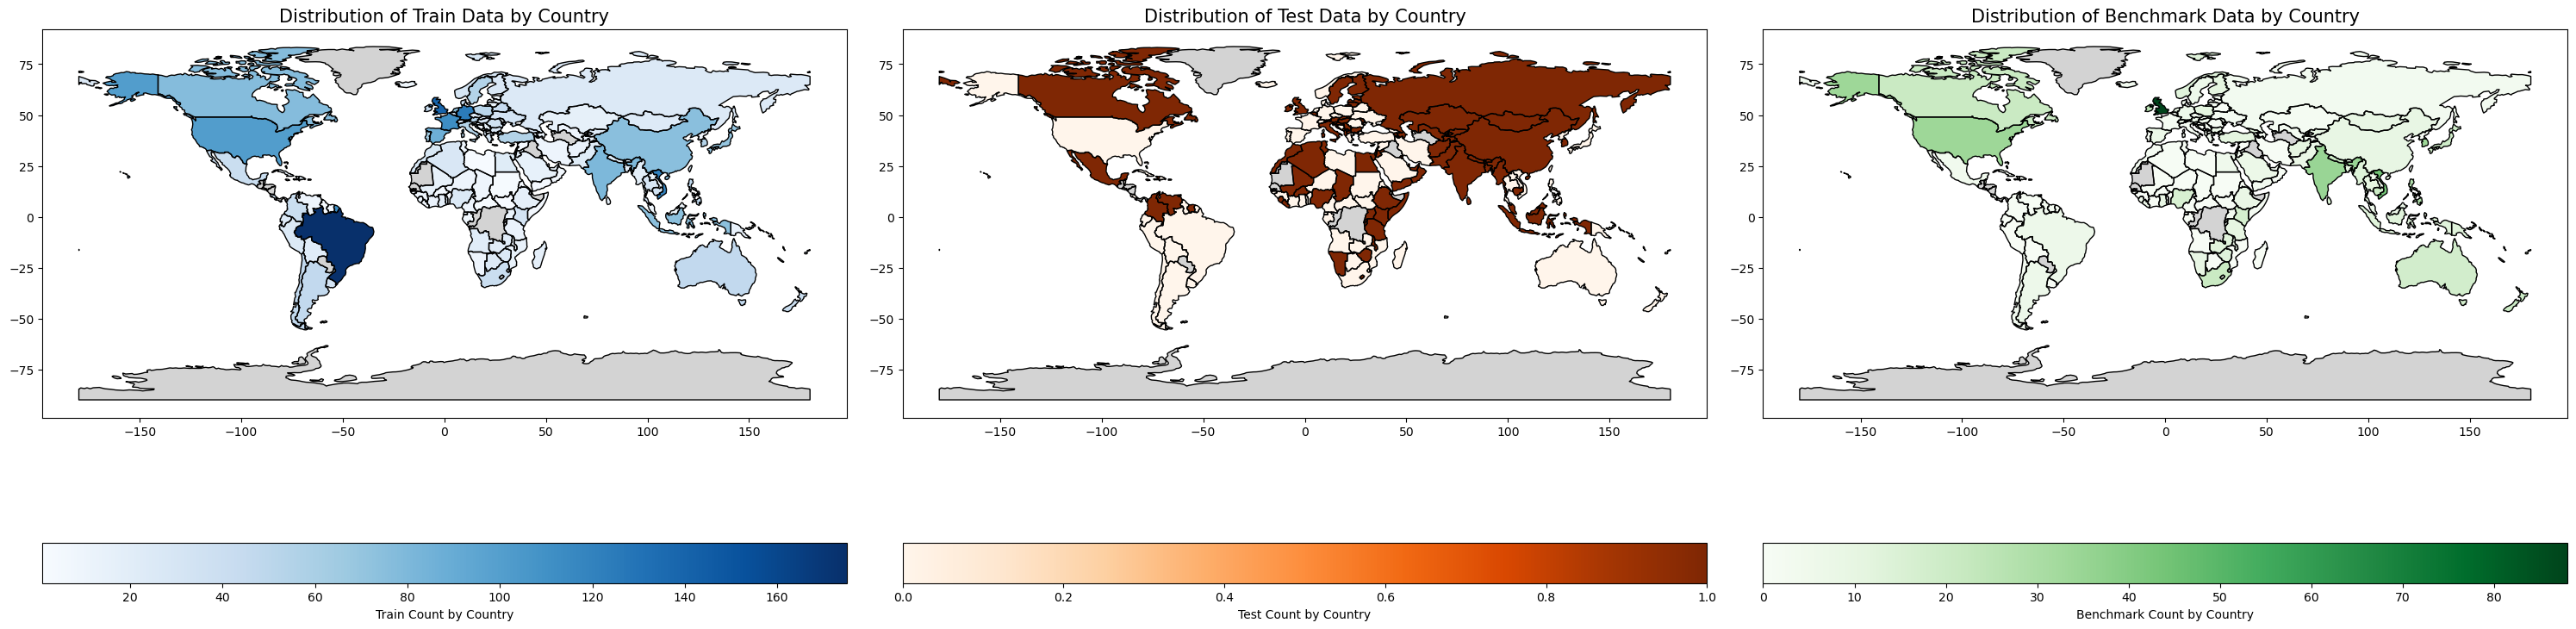

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Prepare world map from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Step 2: Prepare the 'alpha-3' distributions for train, test, and benchmark sets
train_alpha_distribution = train_set['alpha-3'].value_counts().reset_index()
train_alpha_distribution.columns = ['alpha-3', 'train_count']

test_alpha_distribution = test_set['alpha-3'].value_counts().reset_index()
test_alpha_distribution.columns = ['alpha-3', 'test_count']

benchmark_alpha_distribution = benchmark_set['alpha-3'].value_counts().reset_index()
benchmark_alpha_distribution.columns = ['alpha-3', 'benchmark_count']

# Step 3: Merge the world map with the alpha-3 distribution data
# Merge the distributions from train, test, and benchmark into one DataFrame
merged_alpha_distribution = pd.merge(train_alpha_distribution, test_alpha_distribution, on='alpha-3', how='outer')
merged_alpha_distribution = pd.merge(merged_alpha_distribution, benchmark_alpha_distribution, on='alpha-3', how='outer')

# Fill missing values with 0
merged_alpha_distribution = merged_alpha_distribution.fillna(0)

# Merge with world map
world = world.merge(merged_alpha_distribution, left_on='iso_a3', right_on='alpha-3', how='left')

# Step 4: Plot the world map with the distribution data

# Create subplots to show the map for train, test, and benchmark in a single row
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Train set map
world.boundary.plot(ax=axes[0], color='black', linewidth=1)
world.plot(column='train_count', ax=axes[0], legend=True, cmap='Blues', 
           legend_kwds={'label': "Train Count by Country", 'orientation': "horizontal"},
           missing_kwds={"color": "lightgrey"})
axes[0].set_title('Distribution of Train Data by Country', fontsize=15)

# Test set map
world.boundary.plot(ax=axes[1], color='black', linewidth=1)
world.plot(column='test_count', ax=axes[1], legend=True, cmap='Oranges', 
           legend_kwds={'label': "Test Count by Country", 'orientation': "horizontal"},
           missing_kwds={"color": "lightgrey"})
axes[1].set_title('Distribution of Test Data by Country', fontsize=15)

# Benchmark set map
world.boundary.plot(ax=axes[2], color='black', linewidth=1)
world.plot(column='benchmark_count', ax=axes[2], legend=True, cmap='Greens', 
           legend_kwds={'label': "Benchmark Count by Country", 'orientation': "horizontal"},
           missing_kwds={"color": "lightgrey"})
axes[2].set_title('Distribution of Benchmark Data by Country', fontsize=15)

# Final layout adjustment and show plot
plt.tight_layout()

# Save the figure as an SVG file
plt.savefig('figures/country_distribution.svg', format='svg')
plt.show()

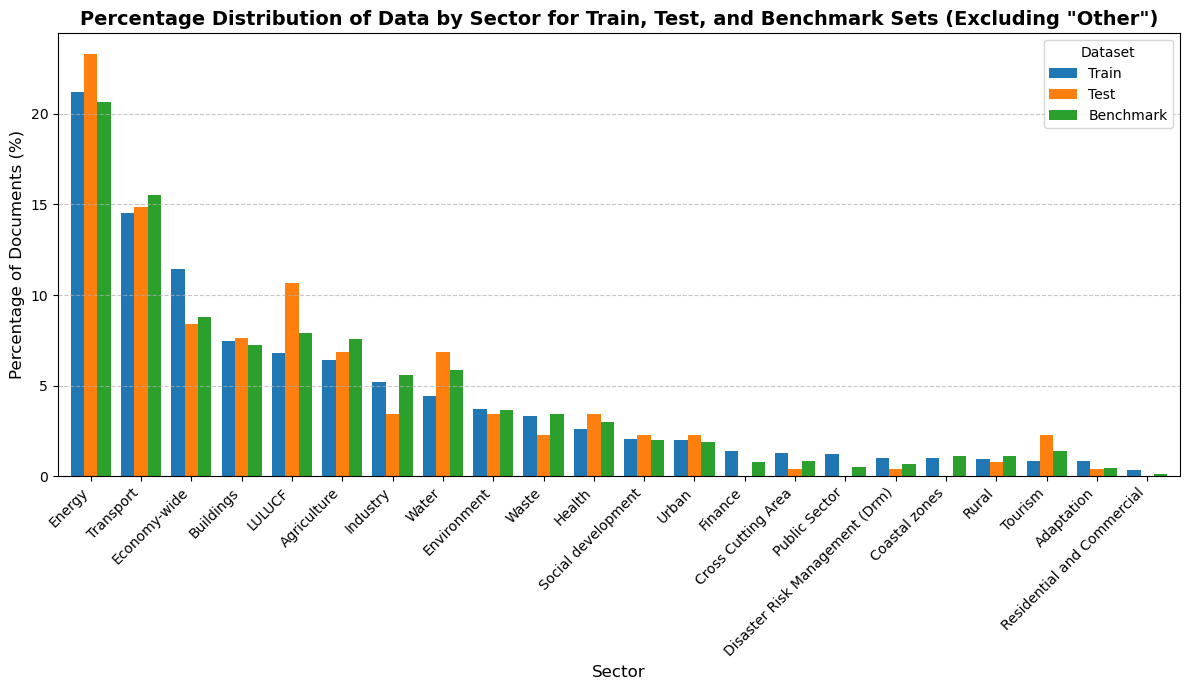

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Explode the 'Sector' column for train, test, and benchmark sets
# Train set
train_temp = train_set.copy()
train_temp['Sector'] = train_temp['Sector'].str.split(';')
train_exploded = train_temp.explode('Sector')
train_exploded = train_exploded.loc[train_exploded['Sector'] != 'Other']  # Exclude 'Other'
train_sector_distribution = train_exploded['Sector'].value_counts(normalize=True).rename('train') * 100

# Test set
test_temp = test_set.copy()
test_temp['Sector'] = test_temp['Sector'].str.split(';')
test_exploded = test_temp.explode('Sector')
test_exploded = test_exploded.loc[test_exploded['Sector'] != 'Other']  # Exclude 'Other'
test_sector_distribution = test_exploded['Sector'].value_counts(normalize=True).rename('test') * 100

# Benchmark set
benchmark_temp = benchmark_set.copy()
benchmark_temp['Sector'] = benchmark_temp['Sector'].str.split(';')
benchmark_exploded = benchmark_temp.explode('Sector')
benchmark_exploded = benchmark_exploded.loc[benchmark_exploded['Sector'] != 'Other']  # Exclude 'Other'
benchmark_sector_distribution = benchmark_exploded['Sector'].value_counts(normalize=True).rename('benchmark') * 100

# Step 2: Combine the sector distributions into a single DataFrame
combined_sector_distribution = pd.concat([train_sector_distribution, test_sector_distribution, benchmark_sector_distribution], axis=1).fillna(0)

# Step 3: Plot the distribution of sectors with percentages for train, test, and benchmark
ax = combined_sector_distribution.plot(kind='bar', figsize=(12, 7), width=0.8, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Step 4: Decorate the plot
ax.set_xlabel('Sector', fontsize=12)
ax.set_ylabel('Percentage of Documents (%)', fontsize=12)
ax.set_title('Percentage Distribution of Data by Sector for Train, Test, and Benchmark Sets (Excluding "Other")', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend and finalize layout
plt.legend(['Train', 'Test', 'Benchmark'], title='Dataset')
plt.tight_layout()

# Save the figure as an SVG file
plt.savefig('figures/sector_distribution.svg', format='svg')

# Show the plot
plt.show()
